# hillmaker (v0.4.6) - Basic Usage

<div class="alert alert-block alert-warning">
    <b>WARNING</b> Numerous API and core code changes have happened to hillmaker recently and this notebook is specific to v0.4.6. The <code>https://github.com/misken/hillmaker-examples/</code> repo contains examples that work with older versions of hillmaker.
</div>

In this notebook we'll focus on basic use of hillmaker for analyzing arrivals, departures, and occupancy by time of day and day of week for a typical *discrete entity flow system*. A few examples of such systems include:

- patients arriving, undergoing some sort of care process and departing some healthcare system (e.g. emergency department, surgical recovery, nursing unit, outpatient clinic, and many more)
- customers renting, using, and returning bikes in a bike share system,
- users of licensed software checking out, using, checking back in a software license,
- products undergoing some sort of manufacturing or assembly process - occupancy is WIP,
- patrons arriving, dining and leaving a restaurant,
- travelers renting, residing in, and checking out of a hotel,
- flights taking off and arriving at their destination,
- ...

Basically, any sort of discrete [stock and flow system](https://en.wikipedia.org/wiki/Stock_and_flow) for which you are interested in time of day and day of week specific statistical summaries of occupancy, arrivals and departures, and have raw data on the arrival and departure times, is fair game for hillmaker.

## A prototypical example of a hillmaker use case

Patients flow through a short stay unit for a variety of procedures, tests or therapies. Let's assume patients can be classified into one of five categories of patient types: ART (arterialgram), CAT (post cardiac-cath), MYE (myelogram), IVT (IV therapy), and OTH (other). From one of our hospital information systems we were able to get raw data about the entry and exit times of each patient and exported the data to a csv file. We call each row of such data a *stop* (as in, the patient stopped here for a while). Let's take a peek at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image

In [2]:
ssu_stopdata = '../data/ShortStay.csv'
stops_df = pd.read_csv(ssu_stopdata, parse_dates=['InRoomTS','OutRoomTS'])
stops_df.info() # Check out the structure of the resulting DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59877 entries, 0 to 59876
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PatID      59877 non-null  int64         
 1   InRoomTS   59877 non-null  datetime64[ns]
 2   OutRoomTS  59877 non-null  datetime64[ns]
 3   PatType    59877 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.8+ MB


In [3]:
stops_df.head()

,PatID,InRoomTS,OutRoomTS,PatType
0,1,1996-01-01 07:44:00,1996-01-01 08:50:00,IVT
1,2,1996-01-01 08:28:00,1996-01-01 09:20:00,IVT
2,3,1996-01-01 11:44:00,1996-01-01 13:30:00,MYE
3,4,1996-01-01 11:51:00,1996-01-01 12:55:00,CAT
4,5,1996-01-01 12:10:00,1996-01-01 13:00:00,IVT


As part of an operational analysis we would like to compute a number of relevant statistics, such as:

- mean and 95th percentile of overall SSU occupancy by hour of day and day of week,
- similar hourly statistics for patient arrivals and departures,
- all of the above but by patient type as well.

In addition to tabular summaries, plots are needed. Like this:

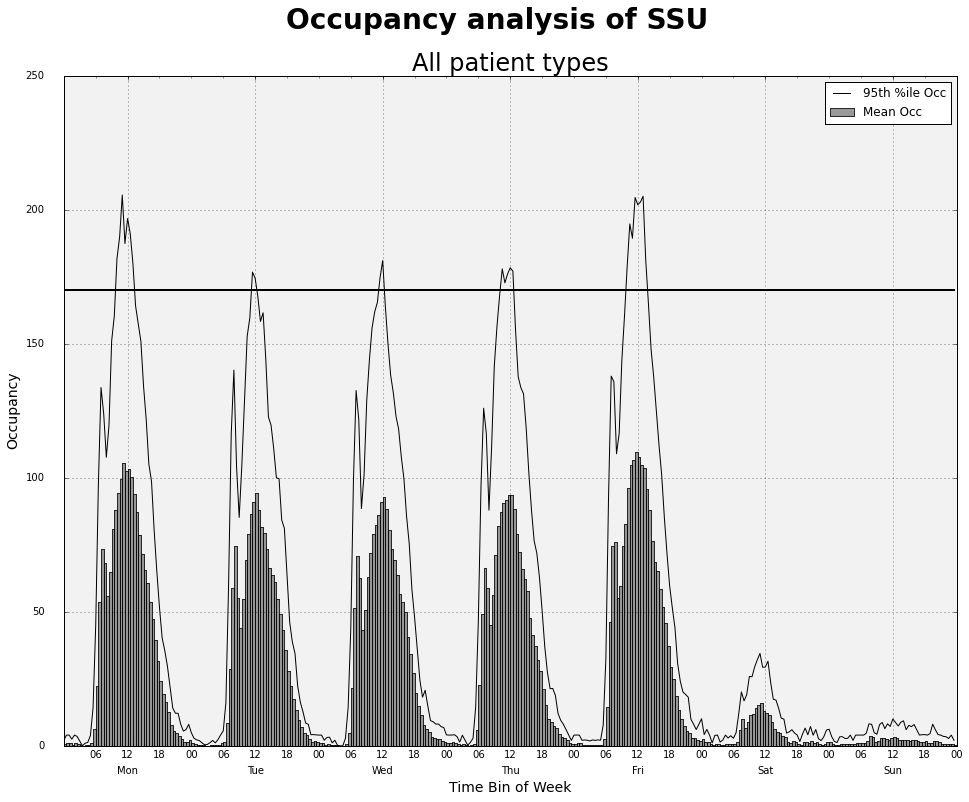

In [4]:
Image(filename="images/ssu-occ.png")

Hillmaker was designed for precisely this type of problem. In fact, the very first version of hillmaker was written for analyzing an SSU when the author was an undergraduate interning at a large health care system. That very first version was written in BASIC on a [DECwriter](https://en.wikipedia.org/wiki/DECwriter)!

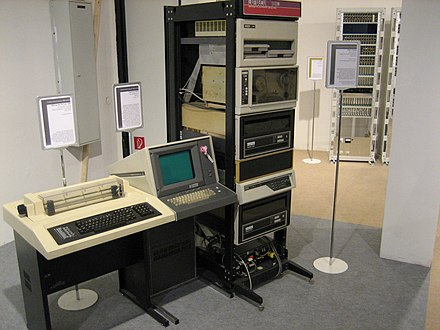

In [5]:
Image(filename="images/DECwriter,_Tektronix,_PDP-11_(192826605).jpg")

<p align = "center">
<font size="-2">Source: By Wolfgang Stief from Tittmoning, Germany - DECwriter, Tektronix, PDP-11, CC0, https://commons.wikimedia.org/w/index.php?curid=105322423</font>
</p>

Over the years, hillmaker was migrated to [FoxPro](https://en.wikipedia.org/wiki/FoxPro), and then to MS Access where it [lived for many years](http://hillmaker.sourceforge.net/). In 2016, I [moved it to Python](https://misken.github.io/blog/hillmaker-python-released/).

## Current (2023-07-24) status of code

Version 0.4.6 was just released and is available on [PyPI](https://pypi.org/project/hillmaker/) or source from https://github.com/misken/hillmaker. This version is much faster than previous versions (thank you numpy) and includes a CLI that also supports TOML formatted config files, flow conservation checks and better logging. It does however revert back to only allowing a single category field (multiple category fields can easily be handled by constructing composite category strings). 

The new hillmaker is implemented as an importable Python module and as a runnable script with a simple CLI. This new version of hillmaker is still in what I'd call a pre-release state. The output does match the Access version for the ShortStay database that I included in the original Hillmaker. I've been actively using it to process thousands of simulation output log files as part of a research project on OB patient flow. More testing is needed before I release it as version 1.0, but it does appear to be doing its primary job correctly. Please open an issue on GitHub if you think it's computing something incorrectly. Before using for any real project work, you should do your own testing to confirm that it is working appropriately for your needs. Use at your own risk - see [LICENSE file in GitHub](https://github.com/misken/hillmaker/blob/master/LICENSE).

## User interface plans
Over the years, I (and many others) have used the old Hillmaker in a variety of ways, including:

- MS Access form based GUI
- run main Hillmaker sub from Access VBA Immediate Window
- run Hillmaker main sub (and/or components subs) via custom VBA procedures

I'd like users to be able to use the new Python based version in a number of different ways as well. As I'll show in this Jupyter notebook, it can be used by importing the `hillmaker` module and then calling hillmaker functions via:

- a Jupyter notebook (or any Python terminal such as an IPython shell or QT console, or IDLE)
- a Python script with the input arguments set and passed via Python statements

### A CLI

While these two options provide tons of flexibility for power users, I have also added a CLI. The CLI is demo'd in this notebook as well.

### A GUI for hillmaker
This is uncharted territory for me. Python has [a number of frameworks/toolkits for creating GUI apps](https://wiki.python.org/moin/GuiProgramming). This is not the highest priority for me but I do plan on creating a GUI for hillmaker. 



## Installing Hillmaker

Whereas the old Hillmaker required MS Access, the new one requires an installation of Python 3.9+ along with several Python modules that are widely used for analytics and data science work. The free and open source [Anaconda Distribution of Python](https://www.anaconda.com/products/distribution) is a great way to get started with Python for analytics work. It is available on all platforms. Once you've got a working version of Python, you can install into a Python (or Conda) virtual environment.

**Option 1 - standard Python virtual environment**

```
$ pip install hillmaker
```

**Option 2 - conda Python virtual environment**

```
$ ~/anaconda3/envs/<conda venv name>/bin/python -m pip install hillmaker
```

The reason for the more convoluted install command when using conda virtual environments is that it turns out to be rather tricky to properly pip install something into a conda virtual environment. This is the source of much confusion and much discussion on StackOverflow. It boils down to making sure that you are using the `pip` executable **in your conda virtual environment** and **NOT** in your base conda environment. This [SO post](https://stackoverflow.com/questions/41060382/using-pip-to-install-packages-to-anaconda-environment/56889729#56889729) explains how the use of the `-m` flag helps in this regard. However, this post doesn't appear to mention that the same issue applies to the `python` executable itself. Again, you **MUST** make sure you are using the `python` executable in your conda virtual environment and not in your conda base environment. If you use Option 2 above, you'll be able to run the `hillmaker` script and its CLI and you'll also be able to import it if you wish to use hillmaker that way.

Obviously if you are comfortable working with source code, you can also install `hillmaker` from its GitHub repo or a clone/fork of it.

## Module imports
To run hillmaker we only need to import a few modules. Since the main hillmaker function uses pandas DataFrames for both data input and output, we need to import `pandas` in addition to `hillmaker`.

In [6]:
import pandas as pd
import hillmaker as hm

## Read main stop data file
Here's the first few lines from our csv file containing the patient stop data:

    PatID,InRoomTS,OutRoomTS,PatType
    1,1/1/1996 7:44,1/1/1996 8:50,IVT
    2,1/1/1996 8:28,1/1/1996 9:20,IVT
    3,1/1/1996 11:44,1/1/1996 13:30,MYE
    4,1/1/1996 11:51,1/1/1996 12:55,CAT
    5,1/1/1996 12:10,1/1/1996 13:00,IVT
    6,1/1/1996 14:16,1/1/1996 15:35,IVT
    7,1/1/1996 14:40,1/1/1996 15:25,IVT


We have already read this data into a pandas DataFrame named `stops_df`. Each record is a "stop" at the SSU.

Check out the top and bottom of `stops_df`. 

In [7]:
stops_df.head(7)

,PatID,InRoomTS,OutRoomTS,PatType
0,1,1996-01-01 07:44:00,1996-01-01 08:50:00,IVT
1,2,1996-01-01 08:28:00,1996-01-01 09:20:00,IVT
2,3,1996-01-01 11:44:00,1996-01-01 13:30:00,MYE
3,4,1996-01-01 11:51:00,1996-01-01 12:55:00,CAT
4,5,1996-01-01 12:10:00,1996-01-01 13:00:00,IVT
5,6,1996-01-01 14:16:00,1996-01-01 15:35:00,IVT
6,7,1996-01-01 14:40:00,1996-01-01 15:25:00,IVT


In [8]:
stops_df.tail(7)

,PatID,InRoomTS,OutRoomTS,PatType
59870,59871,1996-09-30 19:20:00,1996-09-30 20:20:00,IVT
59871,59872,1996-09-30 19:26:00,1996-09-30 21:05:00,CAT
59872,59873,1996-09-30 19:31:00,1996-09-30 20:15:00,IVT
59873,59874,1996-09-30 20:23:00,1996-09-30 21:30:00,IVT
59874,59875,1996-09-30 21:00:00,1996-09-30 22:45:00,CAT
59875,59876,1996-09-30 21:57:00,1996-09-30 22:40:00,IVT
59876,59877,1996-09-30 22:45:00,1996-09-30 23:35:00,CAT


Let's compute some basic summary statistics such as the earliest and latest arrival and departure as well as counts by patient type.

In [9]:
print(f'Earliest arrival = {stops_df["InRoomTS"].min()}')
print(f'Latest departure = {stops_df["OutRoomTS"].max()}')

Earliest arrival = 1996-01-01 07:44:00
Latest departure = 1996-09-30 23:35:00


In [10]:
stops_df.groupby(['PatType'])['PatID'].count()

PatType
ART     5761
CAT    10692
IVT    33179
MYE     6478
OTH     3767
Name: PatID, dtype: int64

Let's get a sense of the number of patient visits by month.

In [11]:
stops_df['InRoomTS'].groupby(stops_df.InRoomTS.dt.to_period("M")).agg('count')

InRoomTS
1996-01    6802
1996-02    6371
1996-03    6628
1996-04    6778
1996-05    6982
1996-06    6580
1996-07    6719
1996-08    6935
1996-09    6082
Freq: M, Name: InRoomTS, dtype: int64

You probably want to do some length of stay analysis, so let's compute it in hours and then do `describe` by patient type. The plan is to add functions to hillmaker to do length of stay analysis automatically. In addition to statistical summaries as shown below, it would be nice to have histograms.

In [12]:
stops_df['LOS'] = (stops_df['OutRoomTS'] - stops_df['InRoomTS']) / pd.Timedelta(1, "h")

In [13]:
stops_df.groupby(['PatType'])['LOS'].describe()

,count,mean,std,min,25%,50%,75%,max
PatType,,,,,,,,
ART,5761.0,1.479483,0.375888,0.533333,1.183333,1.416667,1.75,2.483333
CAT,10692.0,1.043914,0.567298,0.066667,0.666667,0.983333,1.25,5.983333
IVT,33179.0,1.147418,0.702600,0.000000,0.733333,1.000000,1.40,10.916667
MYE,6478.0,1.429021,0.397153,0.533333,1.133333,1.366667,1.70,2.483333
OTH,3767.0,1.502048,0.349509,1.016667,1.200000,1.450000,1.75,2.483333


## Creating occupancy summaries
The primary function in hillmaker is called `make_hills` and plays the same role as the `Hillmaker` function in the original Access VBA version of Hillmaker. Let's get a little help on this function.

In [14]:
help(hm.make_hills)

Help on function make_hills in module hillmaker.hills:

make_hills(scenario_name, stops_df, in_field, out_field, start_analysis_dt, end_analysis_dt, cat_field=None, bin_size_minutes=60, percentiles=(0.25, 0.5, 0.75, 0.95, 0.99), cats_to_exclude=None, occ_weight_field=None, totals=1, cap=None, nonstationary_stats=True, stationary_stats=True, no_censored_departures=False, export_bydatetime_csv=True, export_summaries_csv=True, export_dow_png=False, export_week_png=False, xlabel=None, ylabel=None, output_path=PosixPath('.'), edge_bins=1, verbosity=0)
    Compute occupancy, arrival, and departure statistics by category, time bin of day and day of week.
    
    Main function that first calls `bydatetime.make_bydatetime` to calculate occupancy, arrival
    and departure values by date by time bin and then calls `summarize.summarize`
    to compute the summary statistics.
    
    Parameters
    ----------
    
    scenario_name : str
        Used in output filenames
    stops_df : DataFrame


Most of the parameters are similar to those in the original VBA version, though a few new ones have been added. For example, the `cats_to_exclude` parameter allows you to specify a list of category values for which you do not want occupancy statistics computed. Also, since the VBA version used an Access database as the container for its output, new parameters were added to control output to csv files instead. This latest version of hillmaker also will automatically create plots that can be exported as `png` files - see the `export_dow_png` and `export_week_png` arguments above.

### **WARNING** - Horizon and warmup effects

You need to be careful when specifying the start and end dates for your analysis (we call this the *analysis range*). You need to consider *horizon and warmup effects*. In the SSU example, each stop is just a few hours and there aren't any patients who arrive before 1/1/1996 and are still in the SSU on 1/1/1996. However, if we were working with data in which the stops are a few days in length (such as on an inpatient nursing unit), we need to think about what start date we should use and exactly how the original dataset was extracted. hillmaker is completely capable of properly accounting for patients who arrive before the specified start date for the analysis as well as those who are discharged after the end date. However, it can only work with the stop data provided and you are responsible for considering warmup effects - a transient phase as occupancy builds to some stochastic steady state. Assume you know that you have stop data that was extracted, say, to include all patients discharged between 1/1/2021 and 12/30/2021 and that each stop might last for several days. You wouldn't want to set your hillmaker start date to 1/1/2021 as the system will appear to start out empty and occupancy will have a transient phase until the system fills to some sort of steady state. The longer the length of stay, the longer this warmup phase will take. You might want to experiment with start dates ranging from a few weeks to a few months **after** your earliest arrival time in your hillmaker stop data to see how long the system takes to reach a steady state. Similarly, if your criteria for selectng the stop data was discharges in 1/1/2021-12/30/2021, your data will **not** contain records for those patients admitted before 12/30/2021 but discharged after 12/30/2021. So, you might want to set your end date for hillmaker to be a few weeks before 12/20/2021.

For our SSU data, we don't need to worry about this as patients only stay a few hours and the SSU typically only houses patients between ~6am-10pm.

Let's create variables for the required inputs as well as a few of the optional inputs. 

* The `scenario` value gets used in creating output filenames. 
* The `in_field_name`, `out_field_name` and `cat_field_name` are all string variables used to specifiy the arrival time field, departure time field and patient category field, respectively.
* The `start_date` and `end_date` are also strings that are capabile of being converted to a pandas Timestamp. There is no need to include times as hillmaker will include the entire end date automatically. 

In [15]:
# Required inputs
scenario = 'ss_example_1'
in_field_name = 'InRoomTS'
out_field_name = 'OutRoomTS'
start_date = '1/1/1996'
end_date = '9/30/1996'

# Optional inputs
cat_field_name = 'PatType'
bin_size_minutes = 60
output_path = './output'
verbosity = 1 # INFO level logging



Now we'll call the main `make_hills` function. In addition to capturing the return values we will also take the default behavior of having the summaries exported to csv files. You'll see that the filenames will contain the scenario string.

Full week and day of week plots are created for arrivals, departures and occupancy (new in v0.4.4) and you can specify axis labels.

In [16]:
results_ex1 = hm.make_hills(scenario, stops_df, in_field_name, out_field_name, 
                            start_date, end_date, cat_field=cat_field_name, bin_size_minutes=bin_size_minutes,
                            verbosity=verbosity, output_path=output_path,
                            cap=55, export_dow_png=True, export_week_png=True,
                            xlabel='hour', ylabel='ssu patients')

2023-07-25 09:44:12,879 - hillmaker.bydatetime - INFO - min of intime: 1996-01-01 07:44:00
2023-07-25 09:44:12,880 - hillmaker.bydatetime - INFO - max of intime: 1996-09-30 22:45:00
2023-07-25 09:44:12,880 - hillmaker.bydatetime - INFO - min of outtime: 1996-01-01 08:50:00
2023-07-25 09:44:12,881 - hillmaker.bydatetime - INFO - max of outtime: 1996-09-30 23:35:00
2023-07-25 09:44:12,882 - hillmaker.bydatetime - INFO - start analysis: 1996-01-01, end analysis: 1996-09-30
2023-07-25 09:44:12,910 - hillmaker.bydatetime - INFO - min of entry time_bin = 7
2023-07-25 09:44:12,912 - hillmaker.bydatetime - INFO - max of exit time_bin = 6574 and num_bins=6576
2023-07-25 09:44:13,615 - hillmaker.bydatetime - INFO - cat IVT {'inner': 33179}
2023-07-25 09:44:13,660 - hillmaker.bydatetime - INFO - cat IVT num_arrivals_hm 33179 num_arrivals_stops 33179
2023-07-25 09:44:13,660 - hillmaker.bydatetime - INFO - cat IVT num_departures_hm 33179 num_departures_stops 33179
2023-07-25 09:44:13,663 - hillmake

### Overview of results dataframes (and exported csv files)

There are two main types of output dataframes:

* numbers of arrivals, departures and occupancy by datetime bin over the analysis range
* statistical summaries of arrivals, departures, and occupancy over various datetime and category groupings

The results dictionary is organized with these two types as the highest level keys.

In [17]:
results_ex1.keys()

dict_keys(['bydatetime', 'summaries'])

Digging into the `bydatetime` keys reveals that there is one DataFrame that is by datetime by category and one datetime DataFrame for the totals over all the category values

In [18]:
results_ex1['bydatetime'].keys()

dict_keys(['PatType_datetime', 'datetime'])

In [19]:
results_ex1['bydatetime']['PatType_datetime'].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32880 entries, ('ART', Timestamp('1996-01-01 00:00:00')) to ('OTH', Timestamp('1996-09-30 23:00:00'))
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   arrivals        32880 non-null  float64
 1   departures      32880 non-null  float64
 2   occupancy       32880 non-null  float64
 3   day_of_week     32880 non-null  int64  
 4   dow_name        32880 non-null  object 
 5   bin_of_day_str  32880 non-null  object 
 6   bin_of_day      32880 non-null  int64  
 7   bin_of_week     32880 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [20]:
results_ex1['bydatetime']['PatType_datetime'].head()

arrivals  departures  occupancy  day_of_week  \
PatType datetime                                                            
ART     1996-01-01 00:00:00       0.0         0.0        0.0            0   
        1996-01-01 01:00:00       0.0         0.0        0.0            0   
        1996-01-01 02:00:00       0.0         0.0        0.0            0   
        1996-01-01 03:00:00       0.0         0.0        0.0            0   
        1996-01-01 04:00:00       0.0         0.0        0.0            0   

                            dow_name bin_of_day_str  bin_of_day  bin_of_week  
PatType datetime                                                              
ART     1996-01-01 00:00:00      Mon          00:00           0            0  
        1996-01-01 01:00:00      Mon          01:00           1            1  
        1996-01-01 02:00:00      Mon          02:00           2            2  
        1996-01-01 03:00:00      Mon          03:00           3            3  
        1996-01-01 04:00:00      Mon          04:00           4            4

In [21]:
results_ex1['bydatetime']['PatType_datetime'].tail()

arrivals  departures  occupancy  day_of_week  \
PatType datetime                                                            
OTH     1996-09-30 19:00:00       0.0         0.0        0.0            0   
        1996-09-30 20:00:00       0.0         0.0        0.0            0   
        1996-09-30 21:00:00       0.0         0.0        0.0            0   
        1996-09-30 22:00:00       0.0         0.0        0.0            0   
        1996-09-30 23:00:00       0.0         0.0        0.0            0   

                            dow_name bin_of_day_str  bin_of_day  bin_of_week  
PatType datetime                                                              
OTH     1996-09-30 19:00:00      Mon          19:00          19           19  
        1996-09-30 20:00:00      Mon          20:00          20           20  
        1996-09-30 21:00:00      Mon          21:00          21           21  
        1996-09-30 22:00:00      Mon          22:00          22           22  
        1996-09-30 23:00:00      Mon          23:00          23           23

In [22]:
results_ex1['bydatetime']['PatType_datetime'].iloc[23:40]

arrivals  departures  occupancy  day_of_week  \
PatType datetime                                                            
ART     1996-01-01 23:00:00       0.0         0.0   0.000000            0   
        1996-01-02 00:00:00       0.0         0.0   0.000000            1   
        1996-01-02 01:00:00       0.0         0.0   0.000000            1   
        1996-01-02 02:00:00       0.0         0.0   0.000000            1   
        1996-01-02 03:00:00       0.0         0.0   0.000000            1   
        1996-01-02 04:00:00       0.0         0.0   0.000000            1   
        1996-01-02 05:00:00       0.0         0.0   0.000000            1   
        1996-01-02 06:00:00       2.0         0.0   0.500000            1   
        1996-01-02 07:00:00       6.0         0.0   4.400000            1   
        1996-01-02 08:00:00       5.0         6.0   9.716667            1   
        1996-01-02 09:00:00       5.0         4.0   6.933333            1   
        1996-01-02 10:00:00       2.0         5.0   4.833333            1   
        1996-01-02 11:00:00       5.0         2.0   5.516667            1   
        1996-01-02 12:00:00       1.0         6.0   5.016667            1   
        1996-01-02 13:00:00       3.0         3.0   2.900000            1   
        1996-01-02 14:00:00       0.0         1.0   2.516667            1   
        1996-01-02 15:00:00       1.0         2.0   1.483333            1   

                            dow_name bin_of_day_str  bin_of_day  bin_of_week  
PatType datetime                                                              
ART     1996-01-01 23:00:00      Mon          23:00          23           23  
        1996-01-02 00:00:00      Tue          00:00           0           24  
        1996-01-02 01:00:00      Tue          01:00           1           25  
        1996-01-02 02:00:00      Tue          02:00           2           26  
        1996-01-02 03:00:00      Tue          03:00           3           27  
        1996-01-02 04:00:00      Tue          04:00           4           28  
        1996-01-02 05:00:00      Tue          05:00           5           29  
        1996-01-02 06:00:00      Tue          06:00           6           30  
        1996-01-02 07:00:00      Tue          07:00           7           31  
        1996-01-02 08:00:00      Tue          08:00           8           32  
        1996-01-02 09:00:00      Tue          09:00           9           33  
        1996-01-02 10:00:00      Tue          10:00          10           34  
        1996-01-02 11:00:00      Tue          11:00          11           35  
        1996-01-02 12:00:00      Tue          12:00          12           36  
        1996-01-02 13:00:00      Tue          13:00          13           37  
        1996-01-02 14:00:00      Tue          14:00          14           38  
        1996-01-02 15:00:00      Tue          15:00          15           39

The dataframe has a multi-index with one level for `PatType` and one level for the `datetime`, a `Timestamp`. Each row is one specific hour on a specific date in the analysis range. While `arrivals` and `departures` are integer values, `occupancy` can be fractional since patients may arrive and depart anywhere within a time bin and are given "occupancy credit" for the fraction of time they are present during that timebin.

The other datetime DataFrame represents the overall totals (over all patient types). The index is just a simple `DateTimeIndex`.

In [23]:
results_ex1['bydatetime']['datetime'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6576 entries, 1996-01-01 00:00:00 to 1996-09-30 23:00:00
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   arrivals        6576 non-null   float64
 1   departures      6576 non-null   float64
 2   occupancy       6576 non-null   float64
 3   day_of_week     6576 non-null   int64  
 4   dow_name        6576 non-null   object 
 5   bin_of_day_str  6576 non-null   object 
 6   bin_of_day      6576 non-null   int64  
 7   bin_of_week     6576 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 462.4+ KB


In [24]:
results_ex1['bydatetime']['datetime'].iloc[23:40]

,arrivals,departures,occupancy,day_of_week,dow_name,bin_of_day_str,bin_of_day,bin_of_week
datetime,,,,,,,,
1996-01-01 23:00:00,0.0,0.0,0.000000,0,Mon,23:00,23,23
1996-01-02 00:00:00,0.0,0.0,0.000000,1,Tue,00:00,0,24
1996-01-02 01:00:00,0.0,0.0,0.000000,1,Tue,01:00,1,25
1996-01-02 02:00:00,0.0,0.0,0.000000,1,Tue,02:00,2,26
1996-01-02 03:00:00,0.0,0.0,0.000000,1,Tue,03:00,3,27
1996-01-02 04:00:00,0.0,0.0,0.000000,1,Tue,04:00,4,28
1996-01-02 05:00:00,0.0,0.0,0.000000,1,Tue,05:00,5,29
1996-01-02 06:00:00,6.0,0.0,1.983333,1,Tue,06:00,6,30
1996-01-02 07:00:00,16.0,0.0,12.666667,1,Tue,07:00,7,31


Let's look at an occupancy plot for the full week.

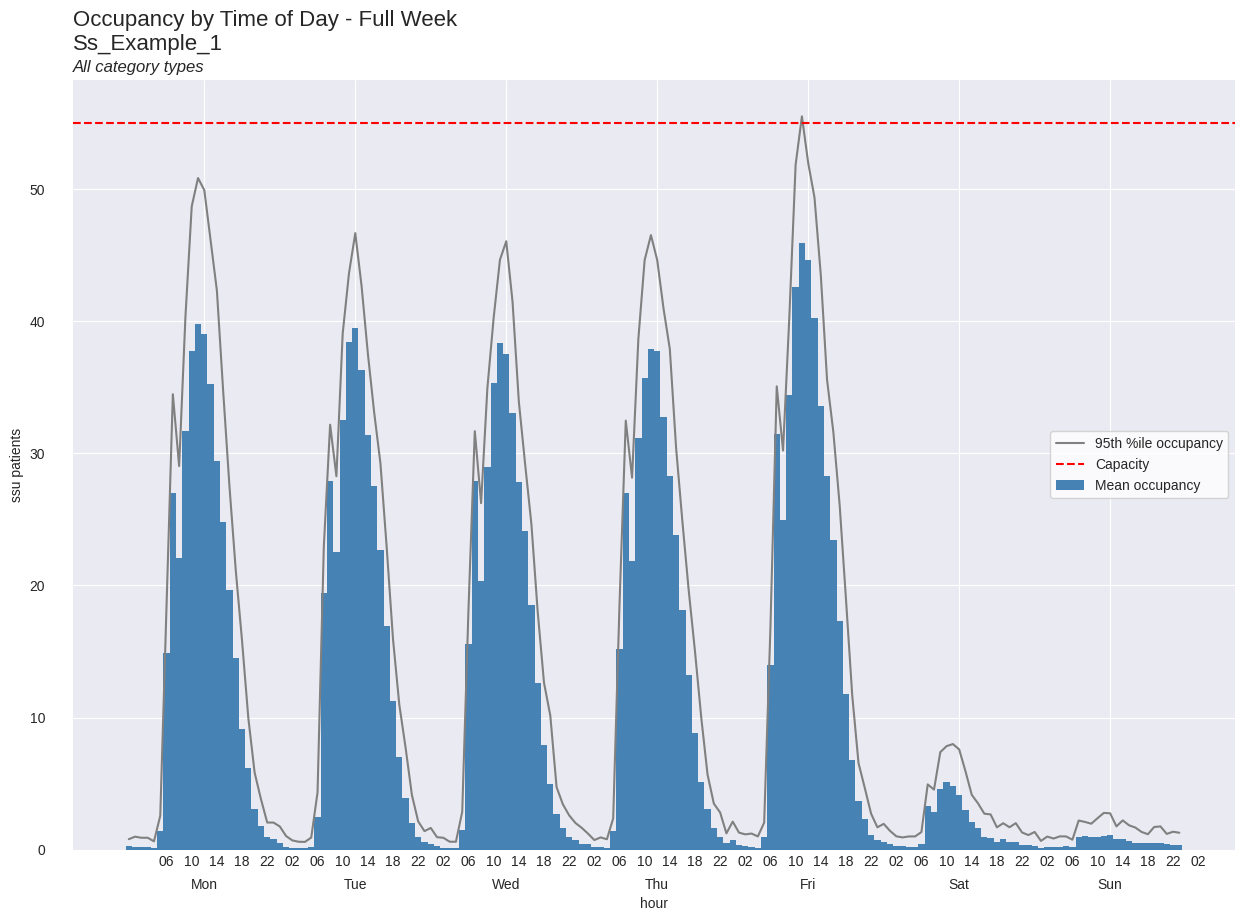

In [25]:
Image(filename="output/ss_example_1_occupancy_plot_full_week.png")

You can also generate plots for individual days of the week.

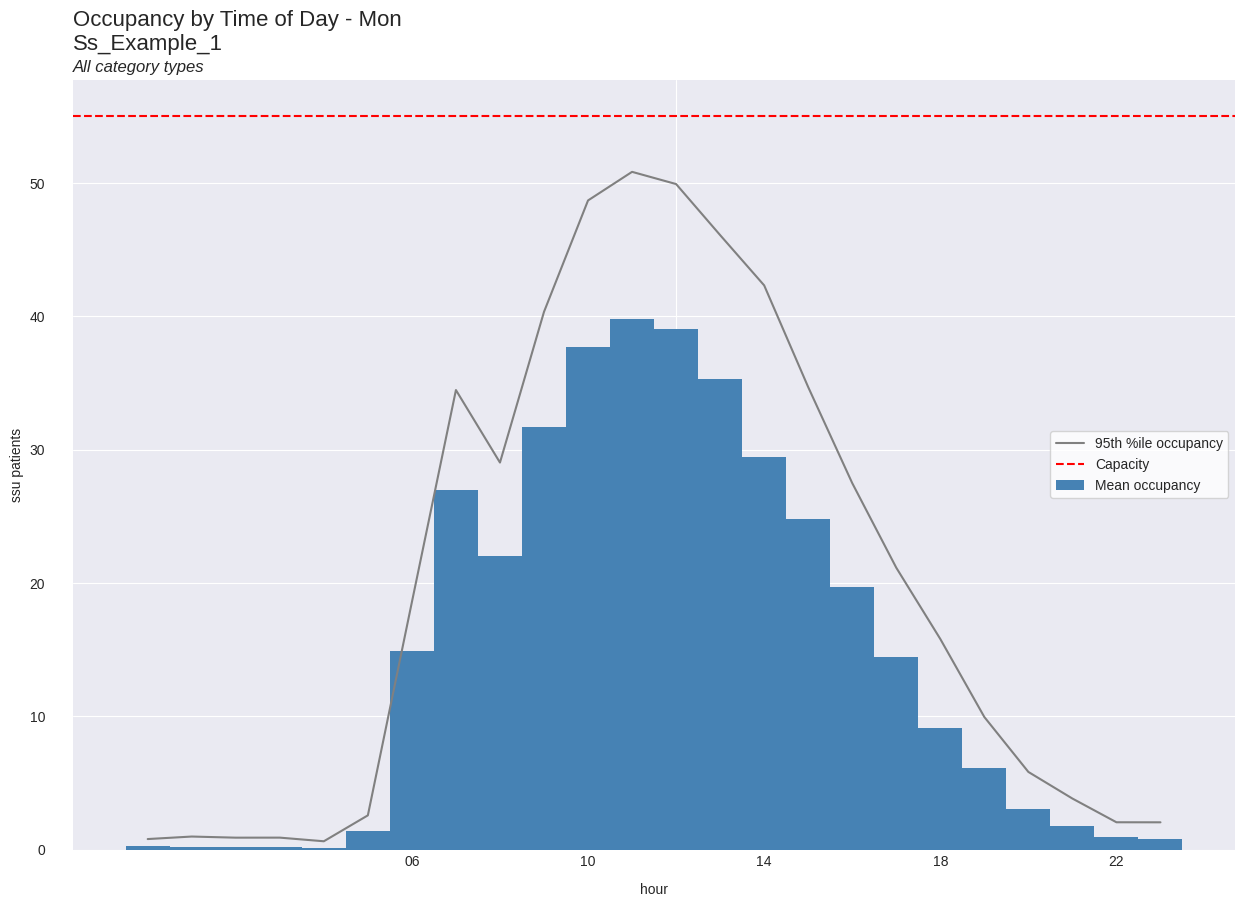

In [26]:
Image(filename="output/ss_example_1_occupancy_plot_mon.png")

Now let's dig into the summary dataframes. There are more of these as each metric - arrivals, departure, and occupancy, gets their own DataFrames. In addition, DataFrames are created for various groupings:

- by category by day of week and time of day bin
- totals over all category values by day of week and time of day bin
- by category
- totals over all category values

The first two items are referred to as *nonstationary* summaries since the statistics are by day of week and time of day. The latter two items are *stationary* summaries as they are simply overall, time independent, statistics.

In [27]:
results_ex1['summaries'].keys()

dict_keys(['nonstationary', 'stationary'])

In [29]:
results_ex1['summaries']['nonstationary'].keys()

dict_keys(['PatType_dow_binofday', 'dow_binofday'])

Within each of these is a dictionary whose keys are flow metrics. To look at overall statistics (i.e. not by `PatType`) use the `'dow_binofday'` key.

In [30]:
results_ex1['summaries']['nonstationary']['dow_binofday'].keys()

dict_keys(['occupancy', 'arrivals', 'departures'])

Each of these three DataFrames has the same structure. We will focus on occupancy as it is the reason we are here. Notice that there are 168 rows in this dataframe, corresponding to the hours of the week. Of course, you can choose a different time bin size when running hillmaker. The multi-index contains day of week and time of bin of day levels in both integer string formats to facilitate plotting. 

Most of the column names are pretty self-explanatory:

- `count` - number of occurances of this datetime bin in the analysis range
- `mean` - mean occupancy in this datetime bin
- `min` - minimum occupancy in this datetime bin
- `max` - maximum occupancy in this datetime bin
- `stdev` - standard deviation occupancy in this datetime bin
- `sem` - standard error of mean occupancy in this datetime bin (`stdev / sqrt(mean)`)
- `var` - variance of occupancy in this datetime bin (`stdev ** 2`)
- `cv` - coefficient of variation of occupancy in this datetime bin (`stdev / mean`)
- `skew` - skew of occupancy in this datetime bin
- `kurtosis` - kurtosis of occupancy in this datetime bin
- `p25` - 25th percentile of occupancy in this datetime bin
- `p50` - 50th percentile (median) of occupancy in this datetime bin
- `p75` - 75th percentile of occupancy in this datetime bin
- `p95` - 95th percentile of occupancy in this datetime bin
- `p99` - 99th percentile of occupancy in this datetime bin

You can specify which percentiles are computed through the `percentiles` argument of the `make_hills` function. Those shown above are the default percentiles that are computed.

In [31]:
results_ex1['summaries']['nonstationary']['dow_binofday']['occupancy'].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 168 entries, (0, 'Mon', 0, '00:00') to (6, 'Sun', 23, '23:00')
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   168 non-null    float64
 1   mean    168 non-null    float64
 2   min     168 non-null    float64
 3   max     168 non-null    float64
 4   stdev   168 non-null    float64
 5   sem     168 non-null    float64
 6   var     168 non-null    float64
 7   cv      168 non-null    float64
 8   skew    168 non-null    float64
 9   kurt    168 non-null    float64
 10  p25     168 non-null    float64
 11  p50     168 non-null    float64
 12  p75     168 non-null    float64
 13  p95     168 non-null    float64
 14  p99     168 non-null    float64
dtypes: float64(15)
memory usage: 21.1+ KB


In [32]:
results_ex1['summaries']['nonstationary']['dow_binofday']['occupancy'].head(10)

count       mean       min  \
day_of_week dow_name bin_of_day bin_of_day_str                               
0           Mon      0          00:00            40.0   0.255000  0.000000   
                     1          01:00            40.0   0.206667  0.000000   
                     2          02:00            40.0   0.204167  0.000000   
                     3          03:00            40.0   0.190000  0.000000   
                     4          04:00            40.0   0.111250  0.000000   
                     5          05:00            40.0   1.376250  0.000000   
                     6          06:00            40.0  14.913750  0.000000   
                     7          07:00            40.0  26.987917  0.266667   
                     8          08:00            40.0  22.059583  0.366667   
                     9          09:00            40.0  31.689583  0.333333   

                                                      max      stdev  \
day_of_week dow_name bin_of_day bin_of_day_str                         
0           Mon      0          00:00            1.833333   0.418453   
                     1          01:00            1.600000   0.380785   
                     2          02:00            0.916667   0.332665   
                     3          03:00            1.133333   0.331142   
                     4          04:00            1.000000   0.255910   
                     5          05:00            3.016667   0.769179   
                     6          06:00           20.150000   4.607183   
                     7          07:00           35.150000   8.092406   
                     8          08:00           30.683333   7.405772   
                     9          09:00           44.733333  10.129506   

                                                     sem         var  \
day_of_week dow_name bin_of_day bin_of_day_str                         
0           Mon      0          00:00           0.066163    0.175103   
                     1          01:00           0.060207    0.144997   
                     2          02:00           0.052599    0.110666   
                     3          03:00           0.052358    0.109655   
                     4          04:00           0.040463    0.065490   
                     5          05:00           0.121618    0.591637   
                     6          06:00           0.728460   21.226138   
                     7          07:00           1.279522   65.487037   
                     8          08:00           1.170955   54.845454   
                     9          09:00           1.601616  102.606890   

                                                      cv      skew      kurt  \
day_of_week dow_name bin_of_day bin_of_day_str                                 
0           Mon      0          00:00           1.640991  2.024153  4.603107   
                     1          01:00           1.842508  2.045914  3.916359   
                     2          02:00           1.629379  1.203569 -0.249311   
                     3          03:00           1.742855  1.583843  1.181465   
                     4          04:00           2.300313  2.349720  4.703609   
                     5          05:00           0.558895 -0.051254 -0.484581   
                     6          06:00           0.308922 -2.510699  6.124962   
                     7          07:00           0.299853 -2.527126  6.242357   
                     8          08:00           0.335717 -1.781253  3.263911   
                     9          09:00           0.319648 -2.184807  4.997000   

                                                      p25        p50  \
day_of_week dow_name bin_of_day bin_of_day_str                         
0           Mon      0          00:00            0.000000   0.000000   
                     1          01:00            0.000000   0.000000   
                     2          02:00            0.000000   0.000000   
                     3          03:00            0.000000   

Detailed plots by patient type can be created from the occupancy dataframe associated with the `'PatType_dow_binofday'` key.

In [33]:
results_ex1['summaries']['nonstationary']['PatType_dow_binofday']['occupancy'].head(10)

count      mean  min  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                         
ART     0           Mon      0          00:00            40.0  0.000000  0.0   
                             1          01:00            40.0  0.000000  0.0   
                             2          02:00            40.0  0.000000  0.0   
                             3          03:00            40.0  0.000000  0.0   
                             4          04:00            40.0  0.000000  0.0   
                             5          05:00            40.0  0.238333  0.0   
                             6          06:00            40.0  3.548333  0.0   
                             7          07:00            40.0  6.803333  0.0   
                             8          08:00            40.0  4.910000  0.0   
                             9          09:00            40.0  4.942500  0.0   

                                                              max     stdev  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                        
ART     0           Mon      0          00:00            0.000000  0.000000   
                             1          01:00            0.000000  0.000000   
                             2          02:00            0.000000  0.000000   
                             3          03:00            0.000000  0.000000   
                             4          04:00            0.000000  0.000000   
                             5          05:00            1.633333  0.339058   
                             6          06:00            6.033333  1.366024   
                             7          07:00           10.133333  2.356410   
                             8          08:00            9.366667  2.269712   
                             9          09:00            9.516667  2.050078   

                                                             sem       var  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                       
ART     0           Mon      0          00:00           0.000000  0.000000   
                             1          01:00           0.000000  0.000000   
                             2          02:00           0.000000  0.000000   
                             3          03:00           0.000000  0.000000   
                             4          04:00           0.000000  0.000000   
                             5          05:00           0.053610  0.114960   
                             6          06:00           0.215987  1.866023   
                             7          07:00           0.372581  5.552667   
                             8          08:00           0.358873  5.151593   
                             9          09:00           0.324146  4.202820   

                                                              cv      skew  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                       
ART     0           Mon      0          00:00           0.000000  0.000000   
                             1          01:00           0.000000  0.000000   
                             2          02:00           0.000000  0.000000   
                             3          03:00           0.000000  0.000000   
                             4          04:00           0.000000  0.000000   
                             5          05:00           1.422620  2.305021   
                             6          06:00           0.384976 -0.928863   
                             7          07:00           0.346361 -1.669042   
                             8          08:00           0.462263 -0.372526   
                             9          09:00           0.414786 -0.694083   

                                                            kurt       p25  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                       
ART     0           Mon      0          00:00           0.000000  0.000000   
                             1        

Each dataframe in the results dictionary can be exported to a csv file using the `export_bydatetime_csv` and `export_summaries_csv` arguments.

In [34]:
# *nix
!ls ./output/ss_example_1_*.csv
# Windows
# !dir .\output\ss_example_1_*.csv

./output/ss_example_1_arrivals.csv
./output/ss_example_1_arrivals_dow_binofday.csv
./output/ss_example_1_arrivals_PatType.csv
./output/ss_example_1_arrivals_PatType_dow_binofday.csv
./output/ss_example_1_bydatetime_datetime.csv
./output/ss_example_1_bydatetime_PatType_datetime.csv
./output/ss_example_1_departures.csv
./output/ss_example_1_departures_dow_binofday.csv
./output/ss_example_1_departures_PatType.csv
./output/ss_example_1_departures_PatType_dow_binofday.csv
./output/ss_example_1_occupancy.csv
./output/ss_example_1_occupancy_dow_binofday.csv
./output/ss_example_1_occupancy_PatType.csv
./output/ss_example_1_occupancy_PatType_dow_binofday.csv


Those csv files (and associated dataframes) not having `'dow_binofday'` in their name are stationary summaries.

In [35]:
# *nix
!cat ./output/ss_example_1_occupancy.csv
# Windows
# !type .\output\ss_example_1_occupancy.csv

count,mean,min,max,stdev,sem,var,cv,skew,kurt,p25,p50,p75,p95,p99
6576.000000,11.050857,0.000000,60.450000,14.416628,0.177780,207.839175,1.304571,1.079433,-0.225840,0.250000,1.983333,21.987500,40.487500,47.829167


In [36]:
# *nix
!cat ./output/ss_example_1_occupancy_PatType.csv
# Windows
# !type .\output\ss_example_1_occupancy_PatType.csv

PatType,count,mean,min,max,stdev,sem,var,cv,skew,kurt,p25,p50,p75,p95,p99
ART,6576.000000,1.296122,0.000000,13.166667,2.315255,0.028551,5.360404,1.786293,1.694090,1.841735,0.000000,0.000000,1.916667,6.466667,8.591667
CAT,6576.000000,1.697313,0.000000,10.650000,2.334648,0.028790,5.450580,1.375496,1.437153,1.097302,0.000000,0.550000,2.750000,6.783333,8.729167
IVT,6576.000000,5.789261,0.000000,34.233333,7.961096,0.098173,63.379055,1.375149,1.229228,0.181904,0.000000,0.916667,10.133333,22.516667,27.129167
MYE,6576.000000,1.407725,0.000000,11.366667,2.285368,0.028182,5.222907,1.623448,1.593619,1.454699,0.000000,0.000000,2.133333,6.483333,8.375000
OTH,6576.000000,0.860434,0.000000,12.183333,1.668233,0.020572,2.783002,1.938827,2.197501,4.608606,0.000000,0.000000,1.000000,4.666667,7.208333


For the stationary summaries, the `count` value of 6576 represents the total number of hourly time bins in the analysis range.

In [37]:
num_days = (pd.Timestamp(end_date) - pd.Timestamp(start_date)) / pd.Timedelta(1, "d") + 1
num_total_bins = num_days * 24
print(f'Total number of hourly bins in analysis range: {num_total_bins:.0f}')


Total number of hourly bins in analysis range: 6576


### Using the CLI
Instead of importing hillmaker and calling the `make_hills` function, you can also use its CLI. Not every input argument to `make_hills` is exposed in the CLI. 

In [38]:
!hillmaker -h

usage: hillmaker [--scenario SCENARIO] [--stop_data_csv STOP_DATA_CSV]
                 [--in_field IN_FIELD] [--out_field OUT_FIELD]
                 [--start_analysis_dt START_ANALYSIS_DT]
                 [--end_analysis_dt END_ANALYSIS_DT] [--config CONFIG]
                 [--cat_field CAT_FIELD] [--bin_size_mins BIN_SIZE_MINS]
                 [--occ_weight_field OCC_WEIGHT_FIELD] [--edge_bins EDGE_BINS]
                 [--no_totals] [--output_path OUTPUT_PATH] [--export_week_png]
                 [--export_dow_png] [--xlabel XLABEL] [--ylabel YLABEL]
                 [--verbosity VERBOSITY] [--cap CAP]
                 [--percentiles [PERCENTILES ...]]
                 [--cats_to_exclude [CATS_TO_EXCLUDE ...]]
                 [--no_censored_departures] [-h]

Occupancy analysis by time of day and day of week

required arguments (either on command line or via config file):
  --scenario SCENARIO   Used in output filenames
  --stop_data_csv STOP_DATA_CSV
                        Pa

In [39]:
!hillmaker --scenario cli_test_ssu --stop_data_csv ../data/ShortStay.csv --in_field InRoomTS --out_field OutRoomTS --start_analysis_dt 1996-01-01 --end_analysis_dt 1996-09-30 --cat_field PatType --verbosity 1 --output_path output

2023-07-25 09:46:14,157 - hillmaker.bydatetime - INFO - min of intime: 1996-01-01 07:44:00
2023-07-25 09:46:14,157 - hillmaker.bydatetime - INFO - max of intime: 1996-09-30 22:45:00
2023-07-25 09:46:14,157 - hillmaker.bydatetime - INFO - min of outtime: 1996-01-01 08:50:00
2023-07-25 09:46:14,157 - hillmaker.bydatetime - INFO - max of outtime: 1996-09-30 23:35:00
2023-07-25 09:46:14,158 - hillmaker.bydatetime - INFO - start analysis: 1996-01-01, end analysis: 1996-09-30
2023-07-25 09:46:14,170 - hillmaker.bydatetime - INFO - min of entry time_bin = 7
2023-07-25 09:46:14,170 - hillmaker.bydatetime - INFO - max of exit time_bin = 6574 and num_bins=6576
2023-07-25 09:46:14,877 - hillmaker.bydatetime - INFO - cat IVT {'inner': 33179}
2023-07-25 09:46:14,921 - hillmaker.bydatetime - INFO - cat IVT num_arrivals_hm 33179 num_arrivals_stops 33179
2023-07-25 09:46:14,921 - hillmaker.bydatetime - INFO - cat IVT num_departures_hm 33179 num_departures_stops 33179
2023-07-25 09:46:14,922 - hillmake

Instead of using all those named command line arguments, you can also use a simple configuration file. I decided to use TOML for the configuration file format as it's very readable and only a quite simple configuration file is needed. Furthermore, TOML has been becoming more widely used in the Python community and a TOML parser will become part of the standard library in Python 3.11. For now, we can use the well known `tomli` library. Here's what the config file looks like. You'll notice it looks a bit like an INI file. See https://toml.io/en/ for more info on TOML.

In [42]:
!cat ../ssu_example.toml

[scenario_data]
scenario = "ssu_test_01"
stop_data_csv = "../data/ShortStay.csv"

[fields]
in_field = "InRoomTS"
out_field = "OutRoomTS"
# Just remove the following line if no category field
cat_field = "PatType"

[analysis_dates]
start_analysis_dt = 1996-01-01
end_analysis_dt = 1996-09-30

[settings]
bin_size_mins = 60
verbosity = 1
output_path = "./output"

# Add any additional arguments here
# Strings should be surrounded in double quotes
# Floats and ints are specified in the normal way as values
# Dates are specified as shown above

# Booleans must be lower case - true or false
no_censored_departures = true

# For arguments that take lists, the entries look
# just like Python lists and following the other rules above

# cats_to_exclude = ["IVT", "OTH"]
# percentiles = [0.5, 0.8, 0.9]


It's just a simple way of grouping the command line arguments and specifying their values. 

In [43]:
!hillmaker --config ../ssu_example.toml

2023-07-25 09:47:45,615 - hillmaker.bydatetime - INFO - min of intime: 1996-01-01 07:44:00
2023-07-25 09:47:45,615 - hillmaker.bydatetime - INFO - max of intime: 1996-09-30 22:45:00
2023-07-25 09:47:45,615 - hillmaker.bydatetime - INFO - min of outtime: 1996-01-01 08:50:00
2023-07-25 09:47:45,615 - hillmaker.bydatetime - INFO - max of outtime: 1996-09-30 23:35:00
2023-07-25 09:47:45,615 - hillmaker.bydatetime - INFO - start analysis: 1996-01-01, end analysis: 1996-09-30
2023-07-25 09:47:45,627 - hillmaker.bydatetime - INFO - min of entry time_bin = 7
2023-07-25 09:47:45,627 - hillmaker.bydatetime - INFO - max of exit time_bin = 6574 and num_bins=6576
2023-07-25 09:47:46,373 - hillmaker.bydatetime - INFO - cat IVT {'inner': 33179}
2023-07-25 09:47:46,417 - hillmaker.bydatetime - INFO - cat IVT num_arrivals_hm 33179 num_arrivals_stops 33179
2023-07-25 09:47:46,417 - hillmaker.bydatetime - INFO - cat IVT num_departures_hm 33179 num_departures_stops 33179
2023-07-25 09:47:46,418 - hillmake

## More examples

I will be creating additional examples to illustrate the capabilities of hillmaker. I will also write some actual documentation.